In [2]:
import os
import pandas as pd

Task: Merge all the monthly files into a single data frame.
Solution: Google and use ChatGBT to find a structured code. 

In [3]:
path = r'C:\Users\SthembisoM\Desktop\Sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
files = [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [4]:
df=all_months_data

In [5]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Data Cleaning 

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data but they are standard things like checking for nulls and correcting data types.

In [7]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head(50) #drop blank rows
df= df.dropna(how='all')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [17]:

df= df[df['Order Date'].str[0:2] != 'Or']
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [18]:
df['Month']= df['Order Date'].str[0:2]

df['Month']= df['Month'].astype('int32')
df.head(5)

C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\3943319698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df['Order Date'].str[0:2]
C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\3943319698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:

df= df[df['Order Date'].str[0:2] != 'Or']
df.head(5)

Convert columns to correct datatype

In [19]:
df['Month']= df['Order Date'].str[0:2]

df['Month']= df['Month'].astype('int32')
df['Quantity Ordered']= df['Quantity Ordered'].astype('int32')
df['Price Each']=pd.to_numeric(df['Price Each'])
df.head(5)

C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\2944239458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df['Order Date'].str[0:2]
C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\2944239458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df['Month'].astype('int32')
C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\2944239458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


EDA: 

Question 1: What was the best month for sales? How much was was earned?

In [21]:

df['Sales']= df['Quantity Ordered']*df['Price Each']

df.head(5)

C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\786426564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']= df['Quantity Ordered']*df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
Sales_by_month = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

print(Sales_by_month)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64


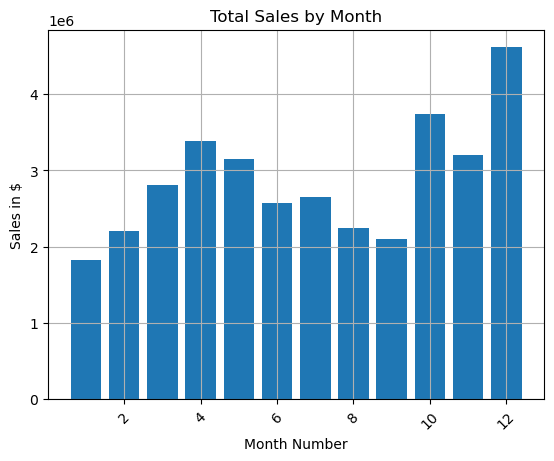

In [23]:
import matplotlib.pyplot as plt

X_axis = range(1,13)
y_axis = df.groupby('Month')['Sales'].sum()

plt.bar(X_axis, y_axis)
plt.title('Total Sales by Month')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.grid(True)           # Optional: Add grid lines
plt.xlabel('Month Number')
plt.ylabel('Sales in $')
plt.show()

From the above graph you can see that April,September and December are the peak months.

What city had the highest sales?


In [ ]:
df.head(5)


In [24]:
def get_city(address):
    return address.split(',')[1]


df['City']= df['Purchase Address'].apply(lambda x: get_city(x))
df.head(5)

C:\Users\SthembisoM\AppData\Local\Temp\ipykernel_2292\2124667823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City']= df['Purchase Address'].apply(lambda x: get_city(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [25]:
Highest_Sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(Highest_Sales)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64


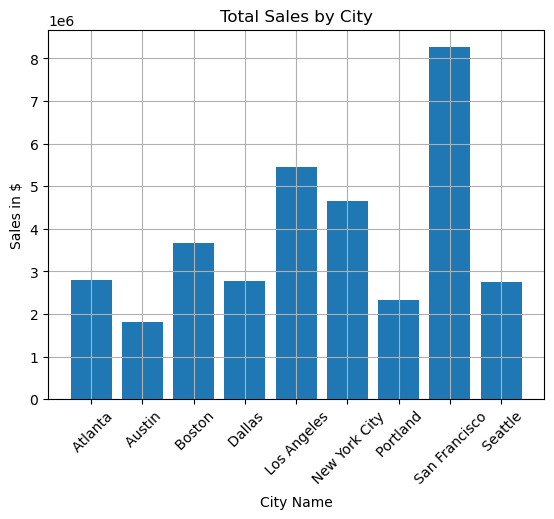

In [26]:


# Get unique city names as a list
X_axis = list(df.groupby('City').groups.keys()) 
# Calculate total sales for each city
y_axis = df.groupby('City')['Sales'].sum()

# Create the bar chart
plt.bar(X_axis, y_axis)
plt.title('Total Sales by City')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.grid(True)           # Optional: Add grid lines
plt.xlabel('City Name')
plt.ylabel('Sales in $')
plt.show()

In [44]:
df['Hour']= pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Product_Encoded,City_Encoded,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,15,3,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,7,2,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,9,4,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,17,4,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,17,4,27


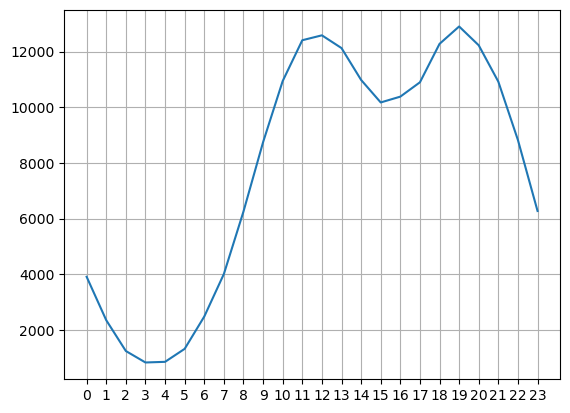

In [77]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


The advertising campaign should target the audience around 11-13 and 18-21

ML Techniques: Predict the orderered quantity

In [30]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [38]:
# Label encode 'Product' and 'City' features
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
df['Product_Encoded'] = le.fit_transform(df['Product'])
df['City_Encoded'] = le.fit_transform(df['City'])

In [33]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Product_Encoded,City_Encoded
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,15,3
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,7,2
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,9,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,17,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,17,4


In [39]:
# Separate features (X) and target variable (y)
X = df[['Price Each', 'Month', 'Sales', 'Hour', 'Product_Encoded', 'City_Encoded']]
y = df['Quantity Ordered']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions for each model
linear_reg_preds = linear_reg.predict(X_test)
random_forest_preds = random_forest_reg.predict(X_test)
gradient_boosting_preds = gradient_boosting_reg.predict(X_test)

# Evaluate performance using mean squared error (MSE)
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_preds)

print("Mean Squared Error:")
print("Linear Regression:", linear_reg_mse)
print("Random Forest Regressor:", random_forest_mse)
print("Gradient Boosting Regressor:", gradient_boosting_mse)

# Evaluate performance using R-squared score
linear_reg_r2 = r2_score(y_test, linear_reg_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_preds)

print("\nR-squared Score:")
print("Linear Regression:", linear_reg_r2)
print("Random Forest Regressor:", random_forest_r2)
print("Gradient Boosting Regressor:", gradient_boosting_r2)

Mean Squared Error:
Linear Regression: 0.17888877465382066
Random Forest Regressor: 6.816348480774402e-05
Gradient Boosting Regressor: 0.00023623936443312198

R-squared Score:
Linear Regression: 0.0808523781062116
Random Forest Regressor: 0.9996497695001697
Gradient Boosting Regressor: 0.9987861795664004


Random Forest Regressor has the lowest Mean Squared Error and highest R-squared Score, indicating the best performance among the three models.
Gradient Boosting Regressor also performs well, with slightly higher Mean Squared Error and slightly lower R-squared Score compared to Random Forest.
Linear Regression has the highest Mean Squared Error and lowest R-squared Score, indicating the weakest performance among the three models.
Therefore, based on these evaluation metrics, the Random Forest Regressor appears to be the most suitable model for predicting the quantity ordered in this scenario.

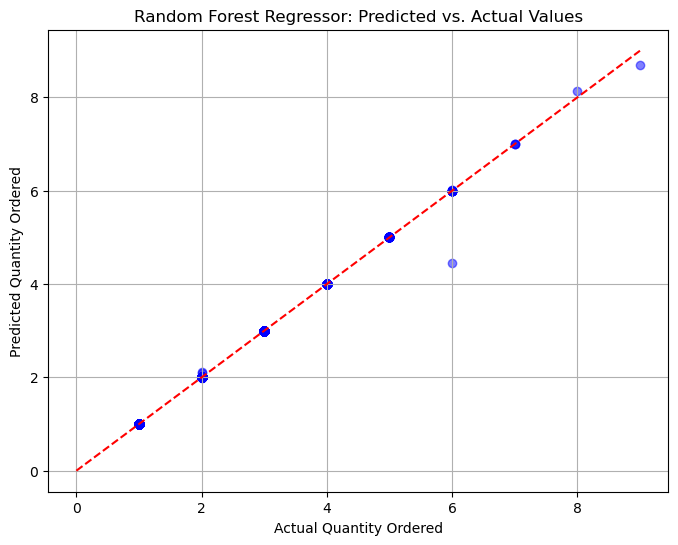

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, random_forest_preds, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Random Forest Regressor: Predicted vs. Actual Values')
plt.xlabel('Actual Quantity Ordered')
plt.ylabel('Predicted Quantity Ordered')
plt.grid(True)
plt.show()